## Extract ransom amount data from https://ransomwhe.re/#about database

In [151]:
import json
import pandas as pd

# Source JSON file
src_file = 'data.json' # Crowdsourced database obtained from https://ransomwhe.re/#about

# Open the JSON file and load its contents
with open(src_file, 'r') as src:
    data = json.load(src)

# Extract date and ransom amount transfered through bitcoin
dict = {'CreatedAt':[],
        'balanceUSD':[]}

year2023 =  False # do not include data from 2023
for item in data: 
    for key, value in item.items():
        if key == "createdAt":
            year = value[:4]
            if year == "2023":
                break
        if key == "balanceUSD" and value != 0:
            balanceUSD = round(value, 2)
            dict['CreatedAt'].append(year)
            dict['balanceUSD'].append(balanceUSD)

ransom_df = pd.DataFrame(dict)

# Sort the DataFrame by the 'balanceUSD' column in descending order
df_sorted = ransom_df.sort_values(by='balanceUSD', ascending=False)

# Extract rows 30 through 130
selected_rows = df_sorted.iloc[501:1001]

# Destination file
dst_file = 'ransom_amt_(no_extreme_vals).xlsx'
selected_rows.to_excel(dst_file, index=False)


## Evaluate R_i values (extracted from https://ransomwhe.re/#about database)


Mean for highest 100 values: 2666.01
Mean for lowest 100 values: 2340.86
Mean for all rows: 2489.22


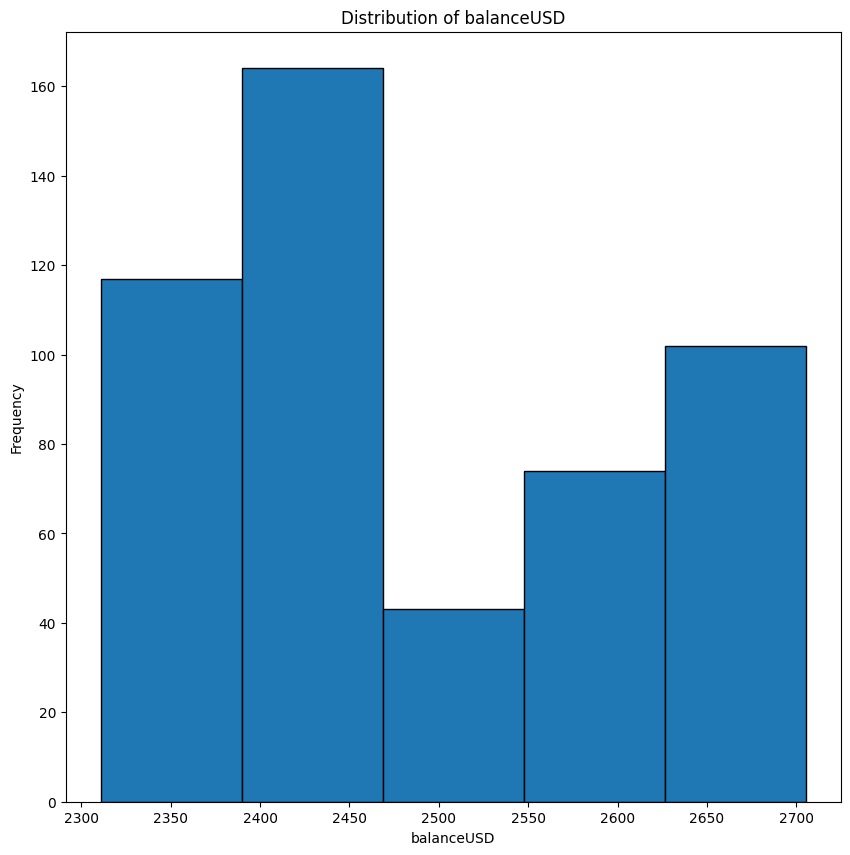

<Axes: ylabel='Density'>

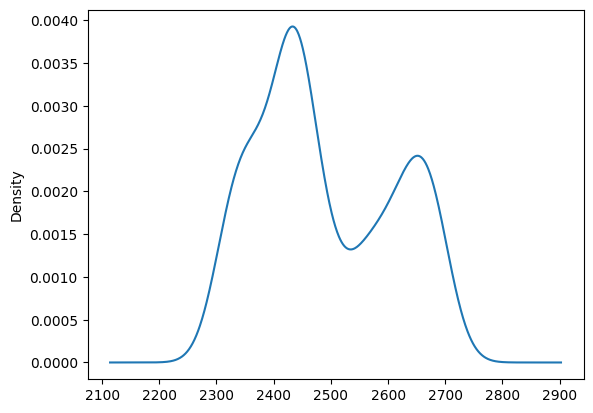

In [152]:
import matplotlib.pyplot as plt

# Find mean value for the first 100 rows
df_first_100 = selected_rows.head(100)
mean_balance_usd = df_first_100['balanceUSD'].mean().round(2)
print("Mean for highest 100 values:", mean_balance_usd)

# Find mean value for the last 100 rows
df_last_100 = selected_rows.tail(100)
min_balance_usd = df_last_100['balanceUSD'].mean().round(2)
print("Mean for lowest 100 values:", min_balance_usd)

# Calculate the mean of the 'balanceUSD' column
mean_balance_usd_all_rows = selected_rows['balanceUSD'].mean().round(2)
print("Mean for all rows:", mean_balance_usd_all_rows)

# Plot the distribution with histogram
plt.figure(figsize=(10, 10))  # Adjust the size as needed
plt.hist(selected_rows['balanceUSD'], bins=5, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('balanceUSD')
plt.ylabel('Frequency')
plt.title('Distribution of balanceUSD')
plt.show()

#plot distribution of values in points column
selected_rows['balanceUSD'].plot(kind='kde')


# Find median


## Populate Dataset for Game Simulation

In [153]:
import pandas as pd
import numpy as np
import random

# Destination file
dst_file = 'dataset_no_extreme_values.xlsx'

# Create dictionary for dataset
dict_02 = {
    'R_i': [],
    'V_i': [],
    'C_D': [],
    'C_ht': [],
    'n_ht': [],
    'C_hp': [],
    'C_hf': [],
    'n_hf': [],
    'C_nh': [],
    'T': [],
    'F': []
}

# Deception Parameter's Average Values
C_ht = 5
n_ht = 1000
C_hp = 72
C_hf = 10
n_hf = 1000
C_nh = 72 + 192  #(C_hp + Network Behavior Analysis for 1 server)
num_rows = len(selected_rows['balanceUSD'])
# print(num_rows)

# Add Ransom Amount to dictionary
# new_column = df_sorted_top_1000['balanceUSD']
dict_02['R_i'] = selected_rows['balanceUSD'].copy()

# Calculate and add Value of Data to dictionary
dict_02['V_i'] = dict_02['R_i'].apply(lambda x: x + random.randint(int(x*.1), int(x*.3)) if int(x) % 2 == 0 else x - random.randint(int(x*.1), int(x*.3)))

# Calculate and add Cost of Ransomware Development to dataset
dict_02['C_D'] = dict_02['V_i'].apply(lambda x: x + random.randint(int(x*.1), int(x*.3)) if int(x) % 2 == 0 else x - random.randint(int(x*.1), int(x*.3)))

# Add Cost of Honeytoken to dataset
dict_02['C_ht'] = np.random.uniform(C_ht-1, C_ht+1, num_rows).round(2)

# Add number of Honeytokens to dataset
dict_02['n_ht'] = np.random.uniform(n_ht-100, n_ht+100, num_rows).round()

# Add Cost of Honeypot to dataset
dict_02['C_hp'] = np.random.uniform(C_hp-10, C_hp+10, num_rows).round(2)

# Add Cost of Honeyfile to dataset
dict_02['C_hf'] = np.random.uniform(C_hf-1, C_hf+1, num_rows).round(2)

# Add number of Honeyfiles to dataset
dict_02['n_hf'] = np.random.uniform(n_hf-100, n_hf+100, num_rows).round()

# Add Cost of Network Honeypot to dataset
dict_02['C_nh'] = np.random.uniform(C_nh-50, C_nh+50, num_rows).round(2)

# Add attacker's reputation to dataset
dict_02['T'] = np.random.uniform(1, 9, num_rows).round()

# Add loss for being arrested to dataset
dict_02['F'] = np.random.uniform(1, 9, num_rows).round()

# Create dataset
dataset = pd.DataFrame(dict_02)
# print(dataset)



# Copy the Dataset to a EXCEL file
dataset.to_excel(dst_file, index=False)

## Normalize Dataset

In [154]:
import pandas as pd

dst_file = 'normalized_dataset_01.xlsx'
norm_dataset = dataset

# Normalize column values
def Normalize(param, magnitude):
    # Min-Max scaling
    min_value = norm_dataset[param].min()
    max_value = norm_dataset[param].max()
    list_normalized = []
    for i in range(num_rows):
        value = magnitude * (norm_dataset[param].iloc[i] - min_value) / (max_value - min_value)
        if value == 0:
            value = 0.0001 #============================================> MODIFY 
        # print(value)    
        list_normalized.append(value)
    norm_dataset[param] = list_normalized

# Normalize columns in norm_dataset
# Normalize('R_i', 100)
# Normalize('V_i', 100)
# Normalize('C_D', 10)
# Normalize('C_ht', 5)
# Normalize('n_ht', 10)
# Normalize('C_hp', 10)
# Normalize('C_hf', 10)
# Normalize('n_hf', 10)
# Normalize('C_nh', 10)
# Normalize('F', 10)
# Normalize('T', 5)

Normalize('R_i', 100)
Normalize('V_i', 100)


# print(norm_dataset)

# Copy the Dataset to an EXCEL file
norm_dataset.to_excel(dst_file, index=False)



## Calculate Deception Success Probabilities and Add to Dataset

In [155]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
import random
import pandas as pd

src_df = pd.read_excel('normalized_dataset_01.xlsx')

# Honeytoken Deception Probability
def ro(C_ht, n_ht, C_D):
    return 1-(m.e**(-(C_ht*n_ht)/C_D))

# Function calculates probabilities for ro and populates ro column in dataset
def get_ro_column(len):
    list_values = []
    # Read and store values from specific columns
    columns = ['C_ht', 'n_ht', 'C_D']  # List of column names
    for i in range(len):
        row_values = src_df.loc[i, columns].tolist()
        probability = ro(row_values[0],row_values[1],row_values[2])
        list_values.append(probability)
    return list_values


# Honeypot Deception Probability
def tao(C_hp, C_D):
    return 1-(m.e**(-C_hp/C_D))

# Function calculates probabilities for tao and populates tao column in dataset
def get_tao_column(len):
    list_values = []
    # Read and store values from specific columns
    columns = ['C_hp', 'C_D']  # List of column names
    for i in range(len):
        row_values = src_df.loc[i, columns].tolist()
        probability = tao(row_values[0],row_values[1])
        list_values.append(probability)
    return list_values

# Honeyfile Deception Probability
def gamma(C_hf, n_hf, C_D):
    return 1-(m.e**(-(C_hf*n_hf)/C_D))

# Function calculates probabilities for gamma and populates gamma column in dataset
def get_gamma_column(len):
    list_values = []
    # Read and store values from specific columns
    columns = ['C_hf', 'n_hf', 'C_D']  # List of column names
    for i in range(len):
        row_values = src_df.loc[i, columns].tolist()
        probability = gamma(row_values[0],row_values[1],row_values[2])
        list_values.append(probability)
    return list_values

# Network Honeypot Deception Probability
def xi(C_nh, C_D):
    return 1-(m.e**(-C_nh/C_D))

# Function calculates probabilities for xi and populates xi column in dataset
def get_xi_column(len):
    list_values = []
    # Read and store values from specific columns
    columns = ['C_nh', 'C_D']  # List of column names
    for i in range(len):
        row_values = src_df.loc[i, columns].tolist()
        probability = xi(row_values[0],row_values[1])
        list_values.append(probability)
    return list_values


num_rows = len(dict_02['V_i'])

# New dictionary for deception probabilities
dict_03 = {
    'ro': [],
    'tao': [],
    'gamma': [],
    'xi': []
}

dict_03['ro'] = get_ro_column(num_rows)
dict_03['tao'] = get_tao_column(num_rows)
dict_03['gamma'] = get_gamma_column(num_rows)
dict_03['xi'] = get_xi_column(num_rows)

new_df = pd.DataFrame(dict_03)
updated_df = src_df.join(new_df)
# print(updated_df)

# Copy the Updated Dataset to a EXCEL file
dst_file = 'dataset_with_probabilities.xlsx'
updated_df.to_excel(dst_file, index=False)



## Evaluate Probabilities & Parameter Values in Normalized Dataset

In [156]:
print('ro mean: ', updated_df['ro'].mean())
print('ro median: ', updated_df['ro'].median(),'\n')

print('tao mean: ', updated_df['tao'].mean())
print('tao median: ', updated_df['tao'].median(),'\n')

print('gamma mean: ', updated_df['gamma'].mean())
print('gamma median: ', updated_df['gamma'].median(),'\n')

print('xi mean: ', updated_df['xi'].mean())
print('xi median: ', updated_df['xi'].median(),'\n')

ro mean:  0.854020823113548
ro median:  0.8664608203379147 

tao mean:  0.03031043169815441
tao median:  0.029038348479574705 

gamma mean:  0.9738886188158504
gamma median:  0.9840845271393275 

xi mean:  0.10711017920899976
xi median:  0.10170266455616817 



## Graph probabilities

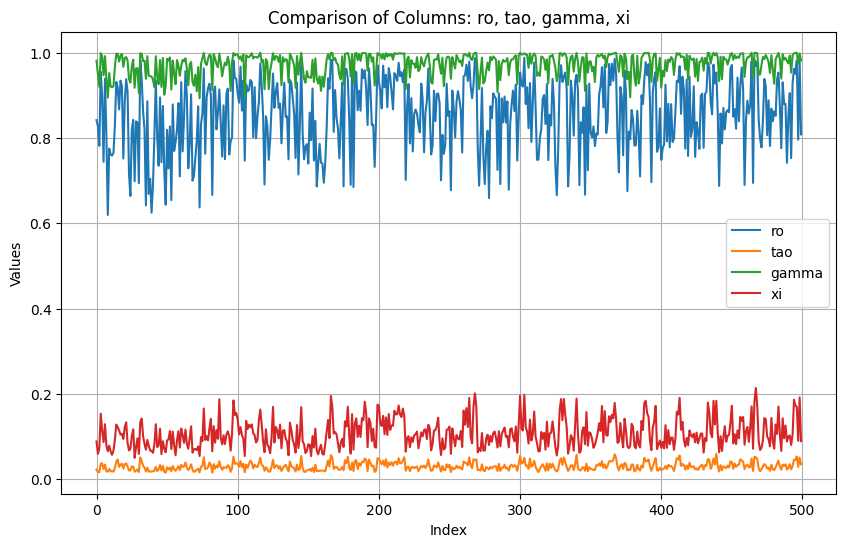

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'updated_df' is your DataFrame

# Select the columns 'ro', 'tao', 'gamma', and 'xi'
selected_columns = ['ro', 'tao', 'gamma', 'xi']
selected_df = updated_df[selected_columns]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(selected_df)
plt.legend(selected_columns)
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of Columns: ro, tao, gamma, xi')
plt.grid(True)
plt.show()
Normalize('R_i', 100)
# Normalize('V_i', 100)

## Graph Deception Probabilities as cost of Ransomware development increases

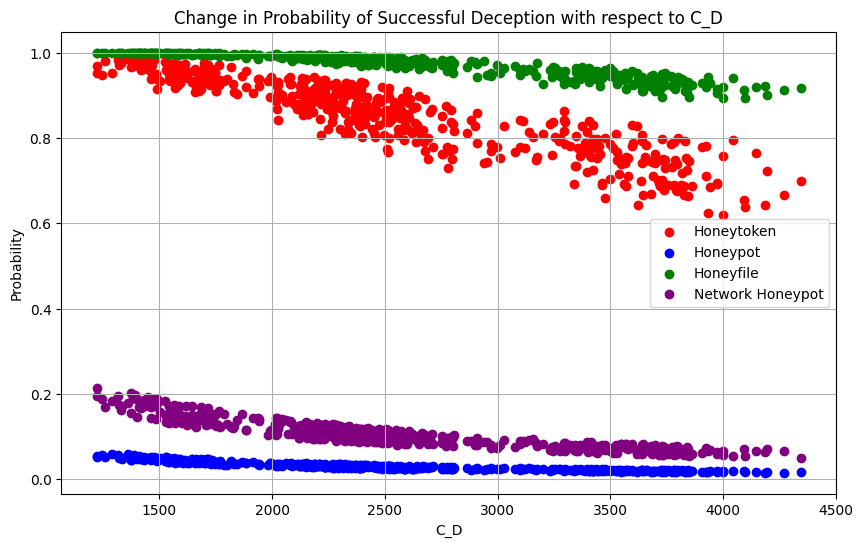

In [161]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'updated_df' is your DataFrame

# Select the columns 'ro', 'tao', 'gamma', 'xi', and 'R_i'
selected_columns = ['ro', 'tao', 'gamma', 'xi', 'C_D']
selected_df = updated_df[selected_columns]

# Create the scatter plot
plt.figure(figsize=(10, 6))

# 'R_i' values on the x-axis, 'ro' values on the y-axis, with color 'red'
plt.scatter(selected_df['C_D'], selected_df['ro'], color='red', label='Honeytoken')
# 'R_i' values on the x-axis, 'tao' values on the y-axis, with color 'blue'
plt.scatter(selected_df['C_D'], selected_df['tao'], color='blue', label='Honeypot')
# 'R_i' values on the x-axis, 'gamma' values on the y-axis, with color 'green'
plt.scatter(selected_df['C_D'], selected_df['gamma'], color='green', label='Honeyfile')
# 'R_i' values on the x-axis, 'xi' values on the y-axis, with color 'purple'
plt.scatter(selected_df['C_D'], selected_df['xi'], color='purple', label='Network Honeypot')

plt.xlabel('C_D')
plt.ylabel('Probability')
plt.title('Change in Probability of Successful Deception with respect to C_D')
plt.legend()
plt.grid(True)
plt.show()


## Evaluate Theorems in Normalized Dataset

In [159]:
import pandas as pd
import numpy as np

#Read from the file
src_df = pd.read_excel('normalized_dataset_01.xlsx')

# Function to generate random values for p0, p1, p2, p3, and p4 satisfying p0 < p1 < p3 and p0 < p2 < p4
def generate_random_p0_p1_p2_p3_p4():
    min_prob = 0.01
    max_prob = 0.6
    while True:
        p0 = np.random.rand()
        p1 = np.random.rand()
        p2 = np.random.rand()
        p3 = np.random.rand()
        p4 = np.random.rand()

        if p0 < p1 < p3 and p0 < p2 < p4:
            break

    return p0, p1, p2, p3, p4


# Apply the function to create new columns "p0", "p1", and "p3"
src_df['p0'], src_df['p1'], src_df['p2'], src_df['p3'], src_df['p4'] = zip(*src_df.apply(lambda row: generate_random_p0_p1_p2_p3_p4(), axis=1))

#Define theorem functions (still need to consult for right formulas)
def theorem1(p0, p1, p3, Vi, T, F):  
    if (p1 + 2*p3 - p0) > (T + Vi) / F:
        return 0
    elif (p1 + 2*p3 - p0) < (T + Vi) / F:
        return 1
    else:
        return np.random.choice([0, 1])
    
def theorem2(p0, p2, p4, V_i, R_i, T, F):
    if (p2 + 2*p4 - p0) > ((V_i - 3*T + 2*R_i) / (F + R_i)):
        return 0
    elif (p2 + 2*p4 - p0) < ((V_i - 3*T + 2*R_i) / (F + R_i)):
        return 1
    else:
        return np.random.choice([0, 1])
def theorem3(p1, p3, V_i, F):
    if ((2*p3 - p1) > (V_i / F)):
        return 0
    elif ((2*p3 - p1) < (V_i / F)):
        return 1
    else:
        return np.random.choice([0, 1])
    
def theorem4(p2, p4, V_i, R_i, T, F):
    if ((2*p4 - p2) > (-T + V_i + R_i) / (F + R_i)):
        return 0
    elif ((2*p4 - p2) < (-T + V_i + R_i) / (F + R_i)):
        return 1
    else:
        return np.random.choice([0, 1])
          
# Apply the theorem functions and add columns for decision-making outcomes:
src_df['Theorem 1 e_i'] = src_df.apply(lambda row: theorem1(row['p0'], row['p1'], row['p3'], row['V_i'], row['T'], row['F']), axis=1)
src_df['Theorem 2 e_i'] = src_df.apply(lambda row: theorem2(row['p0'], row['p2'], row['p4'], row['V_i'], row['R_i'], row['T'], row['F']), axis=1)
src_df['Theorem 3 m_i'] = src_df.apply(lambda row: theorem3(row['p1'], row['p3'], row['V_i'], row['F']), axis=1)
src_df['Theorem 4 m_i'] = src_df.apply(lambda row: theorem4(row['p2'], row['p4'], row['V_i'], row['R_i'], row['T'], row['F']), axis=1)
          
# Save the DataFrame to a new Excel file
src_df.to_excel("data_with_theorems.xlsx", index=False)


## Visualize Theorems with Graphs

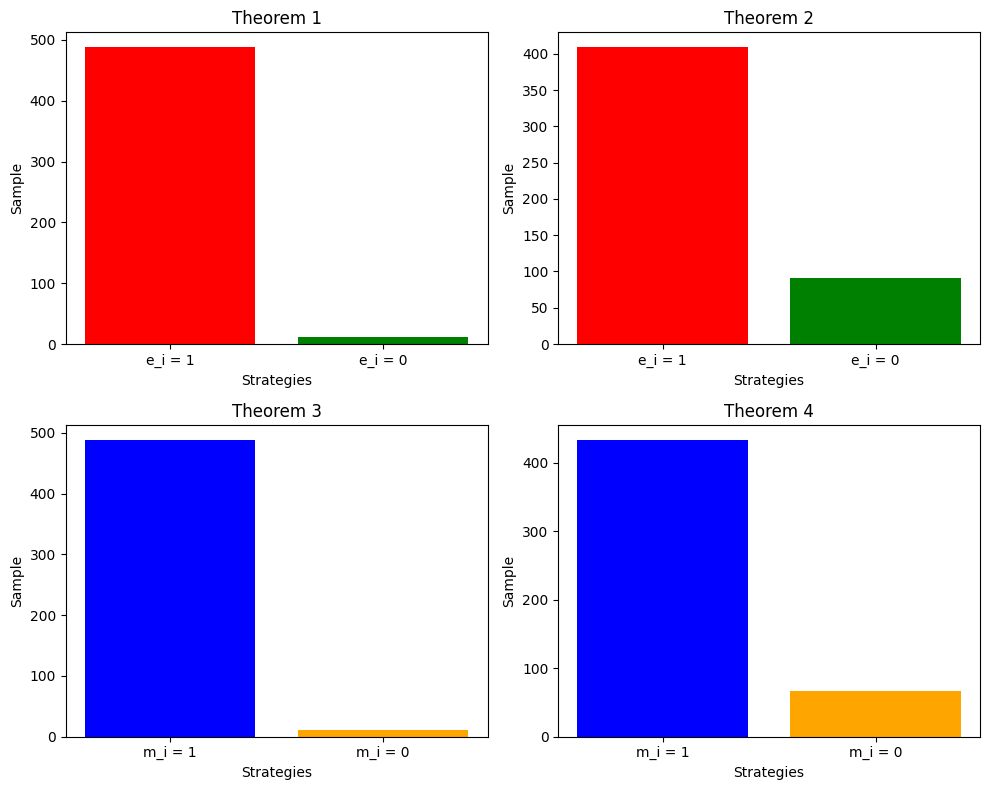

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read from file
src_df = pd.read_excel('data_with_theorems.xlsx')

# Function to create bar plots for each theorem
def plot_theorem_results_e(ax, df, theorem_name):
    theorem_column = df.columns[df.columns.str.contains(theorem_name)].tolist()
    if len(theorem_column) == 0:
        print(f"No column found for {theorem_name}")
        return
    
    ax.bar(['e_i = 1', 'e_i = 0'], df[theorem_column[0]].value_counts(), color=['red', 'green'])
    ax.set_xlabel("Strategies")
    ax.set_ylabel("Sample")
    ax.set_title(f"Theorem {theorem_name.split(' ')[-1]}")
    
def plot_theorem_results_m(ax, df, theorem_name):
    theorem_column = df.columns[df.columns.str.contains(theorem_name)].tolist()
    if len(theorem_column) == 0:
        print(f"No column found for {theorem_name}")
        return
    
    ax.bar(['m_i = 1', 'm_i = 0'], df[theorem_column[0]].value_counts(), color=['blue', 'orange'])
    ax.set_xlabel("Strategies")
    ax.set_ylabel("Sample")
    ax.set_title(f"Theorem {theorem_name.split(' ')[-1]}")    

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the results for each theorem in each subplot
plot_theorem_results_e(axs[0, 0], src_df, "Theorem 1")
plot_theorem_results_e(axs[0, 1], src_df, "Theorem 2")
plot_theorem_results_m(axs[1, 0], src_df, "Theorem 3")
plot_theorem_results_m(axs[1, 1], src_df, "Theorem 4")



# Adjust the layout to prevent overlap of subplots
plt.tight_layout()

# Show the combined graph
plt.show()
